In [ ]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
from sklearn import decomposition
import matplotlib.pyplot as plt
import pydicom as dicom
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
in_dir = "data/"
txt_name = "irisdata.txt"
iris_data = np.loadtxt(in_dir + txt_name, comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:50, 0:4]

In [ ]:
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

<h4>Explorative data analysis</h4>
<p>exercises 2, 3 and 4</p>

In [ ]:
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]

In [ ]:
# Use ddof = 1 to make an unbiased estimate
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_w = pet_w.var(ddof=1)
print(f"variance sep_l: {var_sep_l}, variance sep_w: {var_sep_w}\nvariance pet_l: {var_pet_l}, variance pet_w: {var_pet_w}")

In [ ]:
# covariance between sepal length and sepal whidth
cov_sepl_sepw = (1/(n_obs-1)) * np.sum(np.dot(sep_l, sep_w))
print(f"covariance between sepal length and sepal whidth = {cov_sepl_sepw}")
cov_sepl_petl = (1/(n_obs - 1)) * np.sum(np.dot(sep_l, pet_l))
print(f"covariance between sepal length and petal_length = {cov_sepl_petl}")

/Users/amirbouslama/anaconda3/envs/course02502/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amirbouslama/anaconda3/envs/course02502/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amirbouslama/anaconda3/envs/course02502/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amirbouslama/anaconda3/envs/course02502/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

<Figure size 640x480 with 0 Axes>

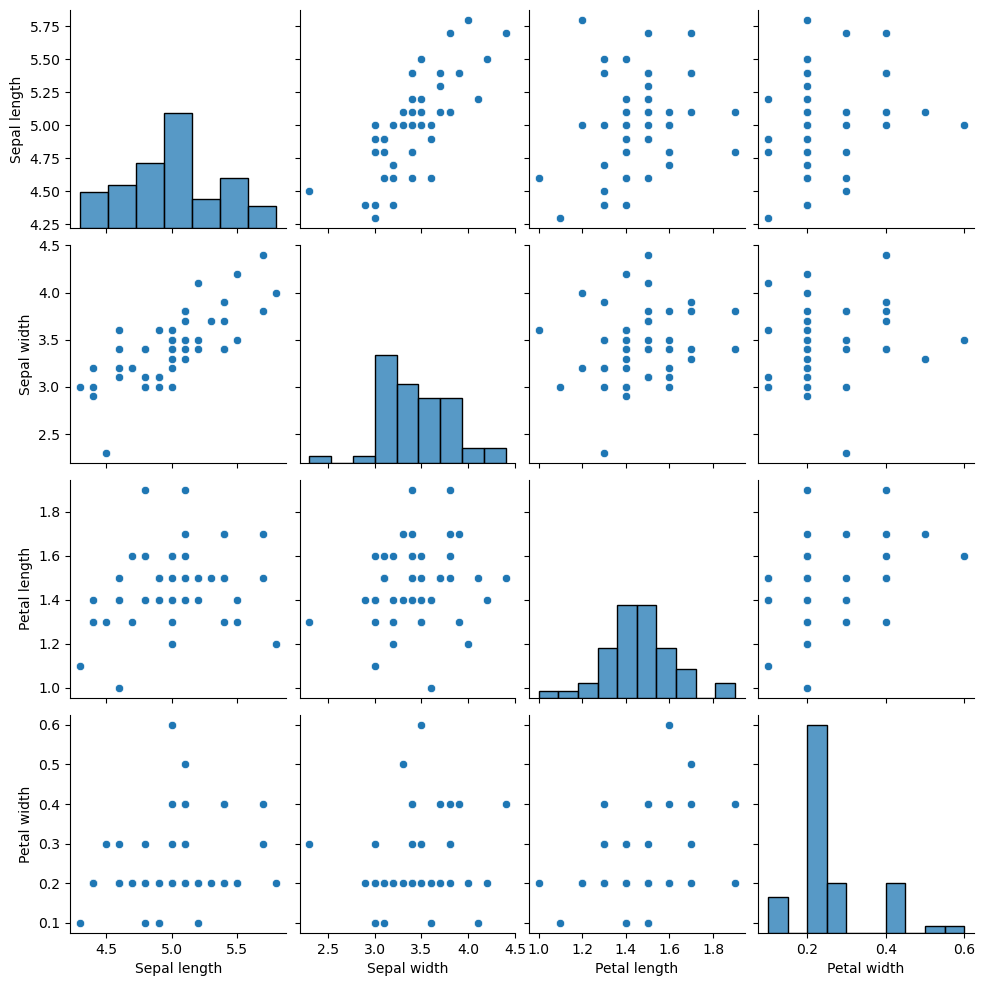

In [12]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=['Sepal length', 'Sepal width',
							 'Petal length', 'Petal width'])
sns.pairplot(d)
plt.show()

<h4>PCA analysis</h4>
<p>exercices 5, 6, 7 and 8</p>

In [13]:
# normalising the data
mn = np.mean(x, axis=0)
data = x - mn

In [14]:
c_x = (1/(n_obs - 1)) * x.T@x
print(f"covariance matrix:\n{c_x}")

covariance matrix:
[[25.69571429 17.61        7.4844898   1.26693878]
 [17.61       12.13469388  5.12571429  0.86979592]
 [ 7.4844898   5.12571429  2.21122449  0.37306122]
 [ 1.26693878  0.86979592  0.37306122  0.07285714]]


In [15]:
#eigenvector analysis
values, vectors = np.linalg.eig(c_x) # Here c_x is your covariance matrix.

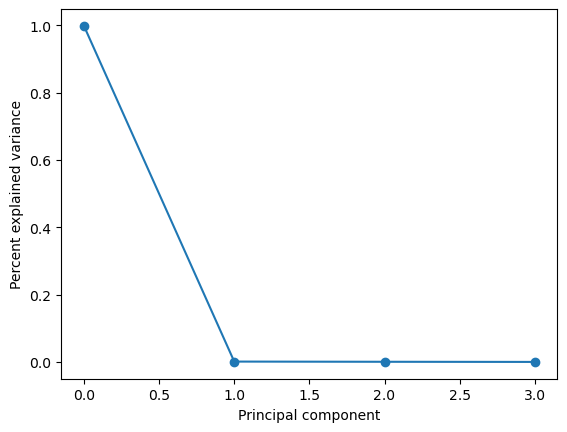

[9.97837135e-01 1.25707563e-03 6.67998899e-04 2.37790607e-04]


In [19]:
v_norm = values / values.sum()
plt.plot(v_norm)
plt.scatter(range(4), v_norm)
plt.xlabel('Principal component')
plt.ylabel('Percent explained variance')
plt.show()
print(v_norm)

In [ ]:
pc_proj = vectors.T.dot(data.T)

In [ ]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(pc_proj.reshape(50, 4), columns=['Sepal length', 'Sepal width',
							 'Petal length', 'Petal width'])
sns.pairplot(d)
plt.show()

<h4>Direct PCA using decomposition function</h4>
<p>exercise 9</p>

In [ ]:
pca = decomposition.PCA()
pca.fit(x)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_

data_transform = pca.transform(data)

In [ ]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(data_transform, columns=['Sepal length', 'Sepal width',
							 'Petal length', 'Petal width'])
sns.pairplot(d)
plt.show()